# **Deep Learning Model for Cancer Type versus Drug Effectiveness/Sensitivity**

**Tianyi Chen**

The purpose of this notebook is to explore a machine learning model which will be able to predict the drug sensitivity (IC50 value) based on an inputted cancer type drug utilized on the cancer.  

Dataset: https://www.kaggle.com/datasets/samiraalipour/genomics-of-drug-sensitivity-in-cancer-gdsc?resource=download

**Methodology**

1. Subset data: extract IC50 value, Cancer Type, and Drug columns.
2. Quantify the data using SciKit Learn's OneHotEncoder. 
3. Create training and testing data using SciKitLearn's Train-Test-Split function.
4. Create and train a Deep Neural Network to predict IC50 value based on Cancer Type and Drug Type
5. Analyze effectiveness of the model using the various measures

In [2]:
#import dataset and packages
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('GDSC2-dataset.csv')

In [3]:
#check dataset
df.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


In [4]:
#subset/filter data
#extract IC_50
IC_50 = pd.DataFrame(df['LN_IC50'])
print(IC_50)

          LN_IC50
0       -1.463887
1       -4.869455
2       -3.360586
3       -5.044940
4       -3.741991
...           ...
242031  10.127082
242032   8.576377
242033  10.519636
242034  10.694579
242035  10.034825

[242036 rows x 1 columns]


In [5]:
#Encode features 
#set x (input) feature (extract Cancer Type and Drug Name)
CellLineInput = pd.DataFrame(df['CELL_LINE_NAME'])
DrugInput = pd.DataFrame(df['DRUG_NAME'])
print(CellLineInput)
print(DrugInput)

       CELL_LINE_NAME
0              PFSK-1
1                A673
2                 ES5
3                 ES7
4               EW-11
...               ...
242031        SNU-175
242032        SNU-407
242033         SNU-61
242034         SNU-C5
242035           DiFi

[242036 rows x 1 columns]
                DRUG_NAME
0            Camptothecin
1            Camptothecin
2            Camptothecin
3            Camptothecin
4            Camptothecin
...                   ...
242031  N-acetyl cysteine
242032  N-acetyl cysteine
242033  N-acetyl cysteine
242034  N-acetyl cysteine
242035  N-acetyl cysteine

[242036 rows x 1 columns]


In [6]:
#encode cancer type and drug type into numerical features in order to be passed into Random Forest
#use encoding function SciKit Learn: Encodes categorical features into one-hot numeric array

#import the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#OneHotEncoder creates, for each categorical feature, a binary column (0, 1) to represent the prescence or absence of that cateogory. 
#one hot encoding is beneficial because no ordinality assumed, compatable with many ML models, no bias
#OneHotEncoding > Label Encoding > Pandas Dummies Method

In [7]:
#First encode Cancer Type 

#initialize an encoder object from the model
#sparse_output = False ensures that we get a dense matrix (array)
encoder = OneHotEncoder(sparse_output = False)

encoded_features = encoder.fit_transform(CellLineInput)
#fit calculates unique categories in input data and prepares encoder to fit one-hot-encoding
#transform applies encoding to the data

encoded_df = pd.DataFrame(encoded_features, columns = encoder.get_feature_names_out(['CELL_LINE_NAME']))
print(encoded_df)

        CELL_LINE_NAME_22RV1  CELL_LINE_NAME_23132-87  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   
...                      ...                      ...   
242031                   0.0                      0.0   
242032                   0.0                      0.0   
242033                   0.0                      0.0   
242034                   0.0                      0.0   
242035                   0.0                      0.0   

        CELL_LINE_NAME_42-MG-BA  CELL_LINE_NAME_451Lu  CELL_LINE_NAME_5637  \
0                           0.0                   0.0                  0.0   
1                           0.0                   0.0                  0.0   
2                           0.0                   0.0                  0.0   
3  

In [8]:
#Now Encode Drug Type
#initialize an encoder object from the model
#sparse_output = False ensures that we get a dense matrix (array)
encoder2 = OneHotEncoder(sparse_output = False)

encoded_features2 = encoder.fit_transform(DrugInput)
#fit calculates unique categories in input data and prepares encoder to fit one-hot-encoding
#transform applies encoding to the data

encoded_df2 = pd.DataFrame(encoded_features2, columns = encoder.get_feature_names_out(['DRUG_NAME']))
print(encoded_df2)

        DRUG_NAME_123138  DRUG_NAME_123829  DRUG_NAME_150412  \
0                    0.0               0.0               0.0   
1                    0.0               0.0               0.0   
2                    0.0               0.0               0.0   
3                    0.0               0.0               0.0   
4                    0.0               0.0               0.0   
...                  ...               ...               ...   
242031               0.0               0.0               0.0   
242032               0.0               0.0               0.0   
242033               0.0               0.0               0.0   
242034               0.0               0.0               0.0   
242035               0.0               0.0               0.0   

        DRUG_NAME_5-Fluorouracil  DRUG_NAME_5-azacytidine  DRUG_NAME_50869  \
0                            0.0                      0.0              0.0   
1                            0.0                      0.0              0.0 

In [9]:
#create training and testing datasets
from sklearn.model_selection import train_test_split 

#concatonate the feature dataframes into a singular dataframe
encodedX = pd.concat([encoded_df, encoded_df2], axis = 1)

#assign and split data
X_train, X_test, y_train, y_test = train_test_split(encodedX, IC_50, test_size = 0.2, random_state = 42)

#check to see our data is actually created.
print("X_train exists:", X_train is not None)
print("y_train exists:", y_train is not None)

X_train exists: True
y_train exists: True


In [10]:
#normalize our data and prepare it for neural network. This gives our data a mean of 0 and standard deviation of of 1
#This will make it easier for our neural network to learn
#initialize the scalar
scaler = StandardScaler()

#Fit the scaler on training data and transform both X_train and X_test
#Essentially, we are getting the mean/SD of the data so we can know the parameters to scale them (fit) then scaling them (transform).

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from tensorflow.keras import layers, models

#Define the model with the Input layer
#We are going to utilize a sequential model in which the layers are stacked on top of each other. This is the simplest type of model. 
model = models.Sequential()

# Input layer. We are inputting our X_train data and telling Tensorflow the number of columns in our data 
#[1] will return the number of columns. This is layer 1.
model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

# First hidden layer. This layer does calculation. Each node in this layer is connected to the node in the previous layer. 
# We've decided to add 128 nodes.
# Relu is a commonly used activation function that helps the model learn from non-linear patterns.
model.add(layers.Dense(128, activation='relu'))

# Second hidden layer. The more layers, the smarter the neural network. 
model.add(layers.Dense(64, activation='relu'))

# Output layer. The output layer will be a single node, since we are predicting the single IC50 value.
model.add(layers.Dense(1))

# Compile the model. This is basically just setting some metrics for how we will evaluate model performance. 
# For instance, the adam optimizer is a popular choice for training neural networks, and we can evaluate loss with mean squared error. 
# The larger the difference between the predicted/actual values, the more the loss.
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model. We are going to use the scikit learn fit function to train the model. 
# The number of Epochs is the number of times we want to run over the training dataset. 
# The more we run over the training dataset,the more the model learns.
# The batch size is the number of samples processed before the model updates its "weights", or what is has learned.
# The validation split is the percentage of the training data we want to use to prevent overfitting.
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 620us/step - loss: 2.5698 - val_loss: 1.4665
Epoch 2/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 597us/step - loss: 1.2899 - val_loss: 1.2501
Epoch 3/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 600us/step - loss: 1.0273 - val_loss: 1.1468
Epoch 4/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 593us/step - loss: 0.8621 - val_loss: 1.0741
Epoch 5/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 593us/step - loss: 0.7372 - val_loss: 1.0602
Epoch 6/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 594us/step - loss: 0.6380 - val_loss: 1.0472
Epoch 7/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 593us/step - loss: 0.5705 - val_loss: 1.0356
Epoch 8/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 587us/step - loss: 0.5224 - val_loss: 1.0314
Epoch 9/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 586us/step - loss: 0.4699 - val_loss: 1.0313
Epoch 10/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 591us/step - loss: 0.4375 - val_loss: 1.0241
Epoch 11/20
4841/4841 ━━━━━━━━━━━━━━━━━━━━ 3s 586us/step - loss: 0.4040 - val_loss: 1.0263
Epoch 12

In [13]:
#now we can check the loss for the testing values. The higher the loss, the less accurate the model.
loss = model.evaluate(X_test_scaled, y_test)
print('Test loss =' + str(loss))

1513/1513 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - loss: 1.1299
Test loss =1.1370331048965454


In [14]:
#We can now make predictions with the data we have set aside for testing. We can generate IC50 values for the test data. 
y_pred = model.predict(X_test_scaled)
# Since y is a numpy array, we print the first 10 predicted IC_50 values
print(y_pred[0 : 10])

1513/1513 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step
[[-2.498867  ]
 [ 3.6121373 ]
 [ 3.774072  ]
 [ 4.625202  ]
 [ 3.9096372 ]
 [ 1.5199921 ]
 [ 3.836415  ]
 [ 2.9265862 ]
 [ 0.813941  ]
 [ 0.40526605]]


In [15]:
#Let's set a baseline for the IC50 values to compare with loss.
baseline_loss = ((y_test - y_test.mean())**2).mean()
print('Baseline Loss:' + str(baseline_loss))

Baseline Loss:LN_IC50    7.662797
dtype: float64


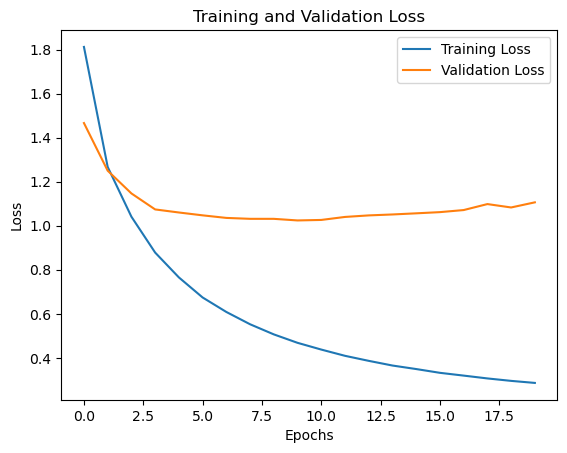

In [16]:
#Visualize Data
import matplotlib.pyplot as plt
#To further assess model performance, we can use visualizations to analyze our data. 

#Plot Training and Validation Loss over the Epochs
plt.plot(history.history['loss'], label = 'Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label = 'Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


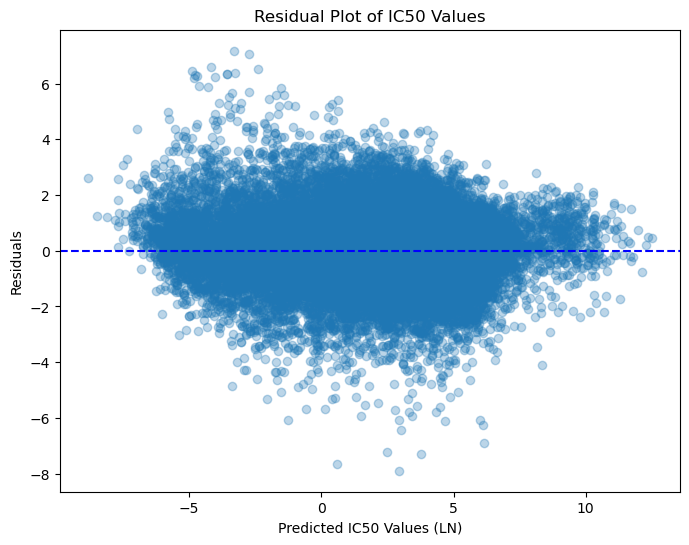

In [17]:
#Residual Plot
#Plot of the difference between the predicted and actual IC50 values. 
residuals = y_test - y_pred 

plt.figure(figsize= (8, 6))
plt.scatter(y_pred, residuals, alpha = 0.3)
plt.axhline(y = 0, color = 'blue', linestyle = '--')
plt.xlabel('Predicted IC50 Values (LN)')
plt.ylabel('Residuals')
plt.title('Residual Plot of IC50 Values')
plt.show()
